In [76]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import keras
from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


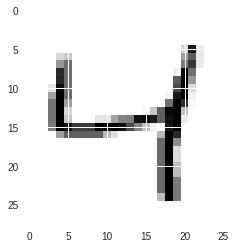

In [80]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[2])

In [0]:
# Creating a 4D tensor out of existing train images and test images
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train =X_train/255
X_test =X_test/255

In [82]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices using 1-hot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [84]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [85]:
model = Sequential()

 
model.add(Convolution2D(32, 7, 7, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(15, 3, 3, activation='relu'))
model.add(Convolution2D(10, 20))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 7), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  """


In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 15)        4335      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 1, 10)          60010     
_________________________________________________________________
flatten_5 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 65,945
Trainable params: 65,945
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint
filepath="model_best.hdf5"
bestModel = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [89]:
model.fit(X_train, Y_train, batch_size=64, epochs=20, validation_data=(X_test, Y_test), callbacks=[bestModel], verbose=0)


Epoch 00001: val_acc improved from -inf to 0.98350, saving model to model_best.hdf5

Epoch 00002: val_acc improved from 0.98350 to 0.98750, saving model to model_best.hdf5

Epoch 00003: val_acc did not improve from 0.98750

Epoch 00004: val_acc did not improve from 0.98750

Epoch 00005: val_acc did not improve from 0.98750

Epoch 00006: val_acc improved from 0.98750 to 0.98860, saving model to model_best.hdf5

Epoch 00007: val_acc did not improve from 0.98860

Epoch 00008: val_acc did not improve from 0.98860

Epoch 00009: val_acc did not improve from 0.98860

Epoch 00010: val_acc improved from 0.98860 to 0.98900, saving model to model_best.hdf5

Epoch 00011: val_acc improved from 0.98900 to 0.98970, saving model to model_best.hdf5

Epoch 00012: val_acc did not improve from 0.98970

Epoch 00013: val_acc did not improve from 0.98970

Epoch 00014: val_acc did not improve from 0.98970

Epoch 00015: val_acc did not improve from 0.98970

Epoch 00016: val_acc did not improve from 0.98970

E

In [90]:
model.load_weights("model_best.hdf5")
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04992211781725368, 0.9897]


In [91]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])

[[1.4411594e-15 2.1773842e-18 1.8804682e-12 1.8717165e-11 1.3591594e-21
  2.3841966e-15 6.0788928e-27 1.0000000e+00 3.3801167e-16 6.9287875e-10]
 [2.1084271e-13 1.0093320e-15 1.0000000e+00 2.7105944e-18 4.5746403e-20
  3.6533389e-25 4.4014694e-13 7.1585757e-23 3.1144202e-16 2.2044186e-20]
 [6.1653059e-13 9.9999952e-01 5.4194843e-10 4.0814851e-12 1.9787481e-07
  7.6620627e-11 2.3035235e-11 9.3414904e-08 2.0559483e-07 8.4800092e-12]
 [1.0000000e+00 3.3358368e-22 2.2612464e-11 1.6776179e-17 2.8999294e-14
  1.1439194e-15 9.0132453e-13 7.1354823e-12 6.8146294e-14 1.9536284e-09]
 [2.2610445e-14 1.2534206e-14 5.2373852e-12 3.9202003e-14 1.0000000e+00
  5.7711531e-16 1.9143732e-13 1.4602719e-10 3.7283929e-11 3.9507476e-08]
 [1.0825867e-15 9.9999988e-01 7.2377190e-13 1.4893826e-14 5.9274239e-09
  2.7209684e-15 8.2163308e-17 1.3972995e-07 2.7963194e-09 1.1148127e-11]
 [3.2265976e-20 8.7741641e-13 9.1009661e-10 4.5182577e-17 9.9996018e-01
  1.9564507e-10 9.2350621e-19 2.1829010e-12 9.8107584e-08 